In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


In [8]:
filename1 = 'C:/Users/vatsa/Master_Accident_Data.xlsx'
acc_df = pd.read_excel(filename1)
print(acc_df.head())

              accdate  Operator_ID  \
0 2017-03-15 18:20:00          365   
1 2016-05-18 08:27:00          173   
2 2018-09-12 14:09:00          329   
3 2019-05-07 15:00:00          276   
4 2015-05-12 07:15:00           42   

                              AccTypeCodeDescr  \
0               Vehicle Approaching From Angle   
1                              Vehicle Passing   
2         Collisions with other motor vehicles   
3               Vehicle Approaching From Angle   
4  Passenger On Board Thrown By RGRTA Movement   

                                 AccSubTypeCodeDescr  \
0  Vehicle approaches from right-both straight ac...   
1     Vehicle cuts in and scrapes RGRTA on left side   
2                                      Miscellaneous   
3  Vehicle approaches from left-vehicle turns-RGR...   
4  Other part of equipment-passenger standing or ...   

                         acctype BAITFISH Code FileNumber   AccPreventable  \
0          03 - MVA with Vehicle             0     17-2

In [13]:
filename2 = 'C:/Users/vatsa/Master_Absence_Data.xlsx'
abs_df = pd.read_excel(filename2).iloc[:, :5]
print(abs_df.head())

  Absence_Type  Operator_ID  From_Date From_Time    To_Date
0       Absent            1 2019-03-13      0:00 2019-03-13
1       Absent            1 2019-02-08      0:00 2019-02-08
2       Absent            1 2019-06-10      0:00 2019-06-12
3       Absent            1 2019-06-06      0:00 2019-06-07
4       Absent            1 2019-06-05      0:00 2019-06-05


In [10]:
filename3 = 'C:/Users/vatsa/Master_Scheduled_Days_Off.xlsx'
sch_df = pd.read_excel(filename3)
print(sch_df.head())

  Effective_On No_Longer_Effective_After Pick_Name Seniority_Date  \
0   2016-04-04                2016-06-26   APR2016     06-20-1974   
1   2016-04-04                2016-06-26   APR2016     08-22-1974   
2   2016-04-04                2016-06-26   APR2016     06-22-1977   
3   2016-04-04                2016-06-26   APR2016     08-03-1977   
4   2016-04-04                2016-06-26   APR2016     02-04-1980   

   Operator_ID   Sun  Mon  Tue  Wed  Thu  Fri   Sat Type_Work  
0            1   OFF  NaN  NaN  NaN  NaN  NaN   OFF   REGULAR  
1            2   OFF  NaN  NaN  NaN  NaN  NaN   OFF        XB  
2            3   OFF  NaN  NaN  NaN  NaN  NaN   OFF   REGULAR  
3            5   OFF  NaN  NaN  NaN  NaN  NaN   OFF   REGULAR  
4            6   OFF  NaN  NaN  NaN  NaN  NaN   OFF        XB  


In [24]:
null_count = acc_df.isnull().sum()
null_count[null_count>0]

AccTypeCodeDescr            3
AccSubTypeCodeDescr         5
acctype                    15
RetrainingDate            748
vehbusno                    2
vehmake                    37
vehyear                    37
VehNoOccupants            720
Drv_Age                     2
Roadway                   121
RoadwayLightConditions    135
RoadwayWeather            146
RoadwaySurface            155
LocAddr1                  276
Addr_Type                 267
dtype: int64

In [14]:
abs_df.Absence_Type.value_counts()

Excused           14962
Absent             9825
Vacation           4332
Medical            3501
Worked Day Off     2403
Holiday            1110
Late to Work        663
Discipline           86
Name: Absence_Type, dtype: int64

In [51]:
acc_df['age_vehicle'] = acc_df.apply(lambda row : 2019 - row.vehyear, axis=1)
print(acc_df.age_vehicle.value_counts())
acc = acc_df[acc_df['age_vehicle'] < 20]

10.0    284
6.0     245
7.0     229
8.0     145
3.0      95
12.0     93
14.0     59
9.0      43
15.0     39
2.0      20
17.0     11
1.0       4
19.0      3
Name: age_vehicle, dtype: int64


Min: 1.0 
Max: 19.0 
Median: 8.0


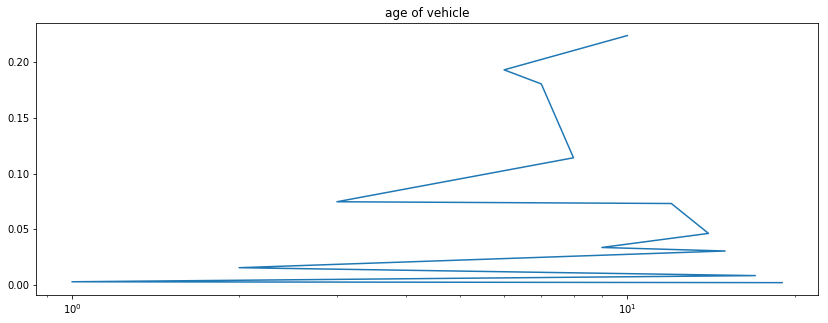

In [56]:
acc.age_vehicle.value_counts(normalize=True).plot(title = "age of vehicle", logx =True, figsize=(14, 5))
print('Min:', acc.age_vehicle.min(), '\n'
      'Max:', acc.age_vehicle.max(), '\n'
      'Median:', acc.age_vehicle.median())

In [55]:
acc.AccPreventable.value_counts(normalize=True)

Non-Preventable    0.523622
Preventable        0.476378
Name: AccPreventable, dtype: float64

we see that close to 550 accidents are caused by new flyer and the second in line is gillig which accounts for 400 accidents, the kde plot says that most accidents happen for buses between 6 and 11 years old out of which new flyer was operational in all the years

In [ ]:
plt.figure(figsize=(14, 5))
acc_preventable = acc.AccPreventable == 'Preventable'
acc_nonpreventable = acc.AccPreventable == 'Non-Preventable'
sns.kdeplot(acc.age_vehicle[acc_preventable], shade=True, color='Blue', label='Preventable').set_xlim=(0, 20)
sns.kdeplot(acc.age_vehicle[acc_nonpreventable], shade=True, color='Red', label='Non-preventable').set_xlim=(0, 20)
plt.title('Age of vehicle by acc type')
plt.show()

In [ ]:
fig, axes = plt.subplots()

In [63]:
accnew = acc[acc.AccPreventable != 'Non-Preventable']
print(accnew.columns)

Index(['accdate', 'Operator_ID', 'AccTypeCodeDescr', 'AccSubTypeCodeDescr',
       'acctype', 'BAITFISH Code', 'FileNumber', 'AccPreventable',
       'Retraining', 'RetrainingDate', 'vehbusno', 'vehmake', 'vehyear',
       'VehNoOccupants', 'Drv_Age', 'CoDrvSex', 'Roadway',
       'RoadwayLightConditions', 'RoadwayWeather', 'RoadwaySurface',
       'LocAddr1', 'Addr_Type', 'Neighborhood', 'age_vehicle'],
      dtype='object')


In [121]:
accnew.CoDrvSex = pd.Categorical(accnew.CoDrvSex).codes
accnew.RoadwayWeather = pd.Categorical(accnew.RoadwayWeather).codes
accnew.RoadwaySurface = pd.Categorical(accnew.RoadwaySurface).codes
accnew.RoadwayLightConditions = pd.Categorical(accnew.RoadwayLightConditions).codes
accnew.Roadway = pd.Categorical(accnew.Roadway).codes
accnew.AccPreventable = pd.Categorical(accnew.AccPreventable).codes
accnew.Roadway = pd.Categorical(accnew.Roadway).codes
accnew.Addr_Type = pd.Categorical(accnew.Addr_Type).codes
accnew.acctype = pd.Categorical(accnew.acctype).codes
accnew.Neighborhood = pd.Categorical(accnew.Neighborhood).codes
accnew.AccSubTypeCodeDescr = pd.Categorical(accnew.AccSubTypeCodeDescr).codes
accnew.AccTypeCodeDescr = pd.Categorical(accnew.AccTypeCodeDescr).codes
accnew.head()

C:\Users\vatsa\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,accdate,Operator_ID,AccTypeCodeDescr,AccSubTypeCodeDescr,acctype,BAITFISH Code,FileNumber,AccPreventable,Retraining,RetrainingDate,...,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,LocAddr1,Addr_Type,Neighborhood,age_vehicle
6,2017-06-20 08:00:00,62,18,31,3,Front End,17-776,0,Y,2017-09-06,...,63.0,2,7,3,1,1,West Ave at Chili Ave,5,1,10.0
7,2015-07-15 17:38:00,241,3,3,4,Turning,15-1148,0,Y,2015-09-30,...,43.0,2,7,3,1,1,Main Street and South Avenue,4,32,10.0
8,2016-09-27 15:25:00,345,3,3,4,Turning,16-1148,0,Y,2016-10-20,...,54.0,2,6,3,1,1,Lexington Ave. @ Wren St.,5,14,10.0
9,2017-03-01 10:04:00,361,0,3,4,Turning,17-208,0,Y,2017-04-20,...,47.0,2,7,3,1,1,218 East Main Street,4,6,10.0
10,2016-02-24 09:58:00,55,1,2,5,Fixed Object,16-259,0,Y,2016-03-30,...,63.0,1,7,3,6,6,1305 Culver Rd.,4,3,10.0


In [122]:
acc2new = accnew[['accdate', 'Operator_ID', 'acctype', 'AccTypeCodeDescr', 'AccPreventable', 'Drv_Age', 'CoDrvSex', 
                  'Roadway', 'RoadwayLightConditions', 'RoadwayWeather','RoadwaySurface','Addr_Type', 'Neighborhood']]
print(acc2new.columns)
acc2new.head(100)

Index(['accdate', 'Operator_ID', 'acctype', 'AccTypeCodeDescr',
       'AccPreventable', 'Drv_Age', 'CoDrvSex', 'Roadway',
       'RoadwayLightConditions', 'RoadwayWeather', 'RoadwaySurface',
       'Addr_Type', 'Neighborhood'],
      dtype='object')


,accdate,Operator_ID,acctype,AccTypeCodeDescr,AccPreventable,Drv_Age,CoDrvSex,Roadway,RoadwayLightConditions,RoadwayWeather,RoadwaySurface,Addr_Type,Neighborhood
6,2017-06-20 08:00:00,62,3,18,0,63.0,2,7,3,1,1,5,1
7,2015-07-15 17:38:00,241,4,3,0,43.0,2,7,3,1,1,4,32
8,2016-09-27 15:25:00,345,4,3,0,54.0,2,6,3,1,1,5,14
9,2017-03-01 10:04:00,361,4,0,0,47.0,2,7,3,1,1,4,6
10,2016-02-24 09:58:00,55,5,1,0,63.0,1,7,3,6,6,4,3
11,2018-11-26 07:54:00,218,5,0,0,46.0,1,7,3,6,6,0,0
15,2016-03-14 16:52:00,29,4,2,0,47.0,2,0,0,0,0,4,6
16,2015-09-05 19:17:00,493,5,1,0,46.0,2,7,5,1,6,4,3
18,2014-09-14 14:58:00,237,4,3,0,49.0,2,2,3,2,1,4,0
19,2016-11-29 16:40:00,184,4,3,0,35.0,2,7,1,2,1,4,26


In [20]:
df3 = pd.merge(acc_df, abs_df, how = 'inner', on = 'Operator_ID')
print(df3.head())

              accdate  Operator_ID                AccTypeCodeDescr  \
0 2017-03-15 18:20:00          365  Vehicle Approaching From Angle   
1 2017-03-15 18:20:00          365  Vehicle Approaching From Angle   
2 2017-03-15 18:20:00          365  Vehicle Approaching From Angle   
3 2017-03-15 18:20:00          365  Vehicle Approaching From Angle   
4 2017-03-15 18:20:00          365  Vehicle Approaching From Angle   

                                 AccSubTypeCodeDescr                acctype  \
0  Vehicle approaches from right-both straight ac...  03 - MVA with Vehicle   
1  Vehicle approaches from right-both straight ac...  03 - MVA with Vehicle   
2  Vehicle approaches from right-both straight ac...  03 - MVA with Vehicle   
3  Vehicle approaches from right-both straight ac...  03 - MVA with Vehicle   
4  Vehicle approaches from right-both straight ac...  03 - MVA with Vehicle   

  BAITFISH Code FileNumber   AccPreventable Retraining RetrainingDate  \
0             0     17-249  Non

In [153]:
#intersection vs acctype
x = acc2new.iloc[:, [2, 12]].values
print(x.shape)


(605, 2)


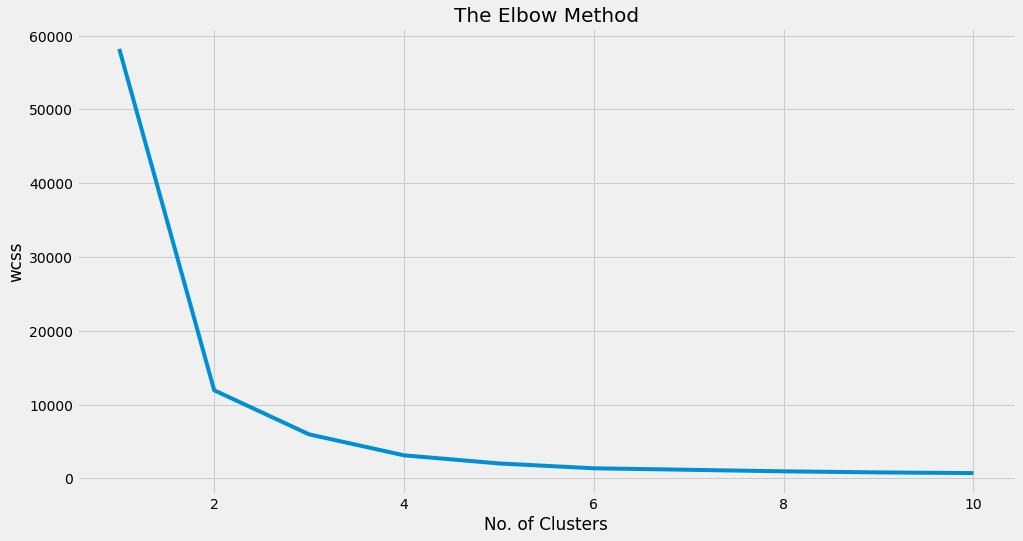

In [154]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

The below clusters show that no.4  - MVA with vehicle and MVA with fixed object are the most common causes of preventable accidents in almost all neighborhoods irrespective of the kind of neighborhood it is. The initial though that MVA with vehicle is the maximum in central business district got rejected because the overall number of accidents is also higher in that area.

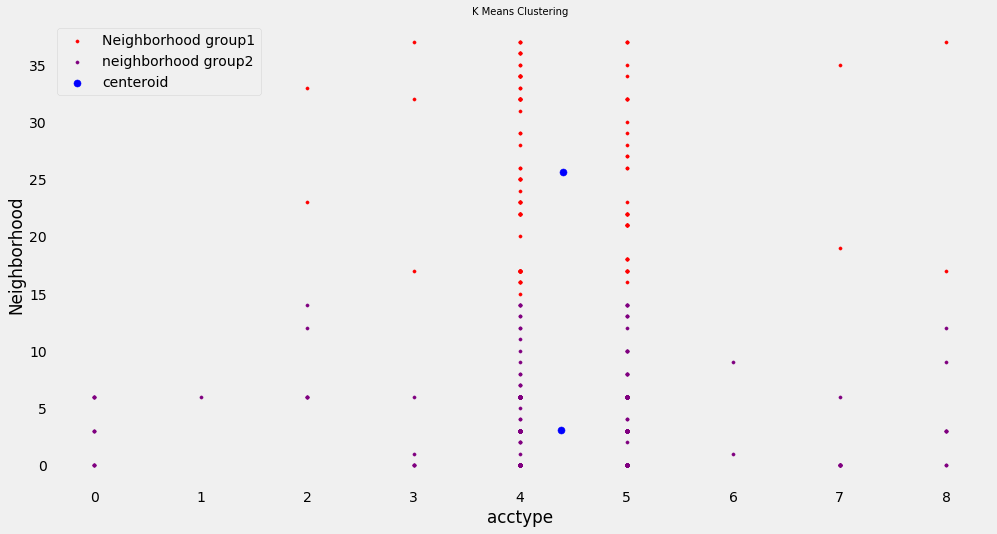

In [166]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 10, c = 'red', label = 'Neighborhood group1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 10, c = 'purple', label = 'neighborhood group2')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 10)
plt.xlabel('acctype')
plt.ylabel('Neighborhood')
plt.legend()
plt.grid()
plt.show()

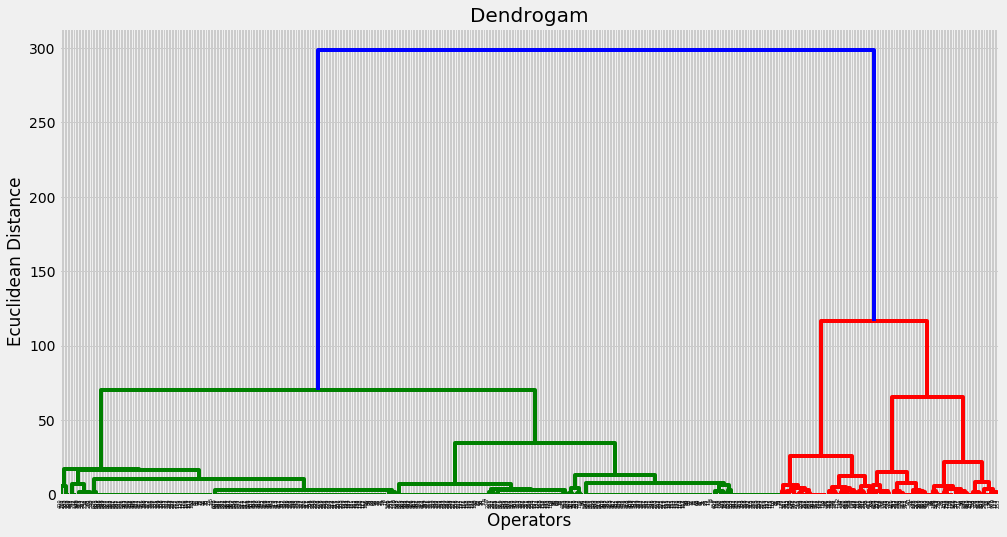

In [163]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Operators')
plt.ylabel('Ecuclidean Distance')
plt.show()

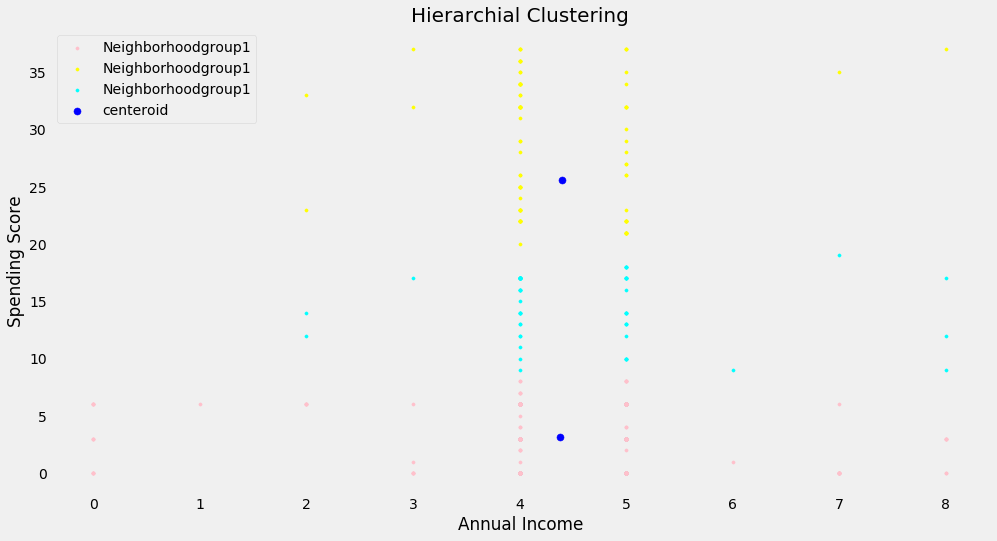

In [164]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 10, c = 'pink', label = 'Neighborhoodgroup1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 10, c = 'yellow', label = 'Neighborhoodgroup1')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 10, c = 'cyan', label = 'Neighborhoodgroup1')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()
